In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

train_df = pd.read_csv("./Resources/train.csv")
train_df.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [3]:
test_df = pd.read_csv("./Resources/test.csv")
test_df.head()

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


In [218]:
bids_df = pd.read_csv("./Resources/bids.csv")
bids_df.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


## Bidder Dataset
###  - Train

In [8]:
# Total number of data
train_df.count()

bidder_id          2013
payment_account    2013
address            2013
outcome            2013
dtype: int64

In [5]:
# Robot vs Human
train_df.outcome.value_counts()

0.0    1910
1.0     103
Name: outcome, dtype: int64

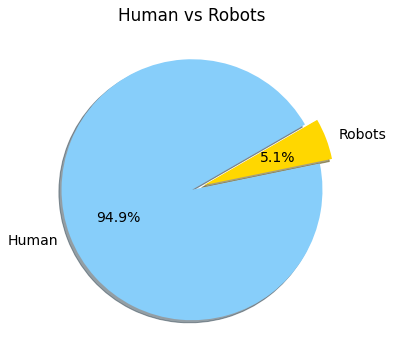

In [185]:
# Plot the results
x = train_df.outcome.value_counts()

plt.subplots(figsize=(10, 6))
plt.pie(x, labels=["Human", "Robots"], colors=["lightskyblue", "gold"],explode=[0, 0.1], autopct='%1.1f%%', shadow=True,startangle=30)
plt.title("Human vs Robots")
mpl.rcParams['font.size'] = 14
plt.show()

Imbalanced dataset

In [12]:
# Is there duplicate bidders
print(f"Bidder_id: {train_df.bidder_id.nunique()}")
print(f"Payment_acct: {train_df.payment_account.nunique()}")
print(f"Address: {train_df.address.nunique()}")

Bidder_id: 2013
Payment_acct: 2013
Address: 2013


Seems all data are unique

### - Test

In [13]:
# Total number of data
test_df.count()

bidder_id          4700
payment_account    4700
address            4700
dtype: int64

In [14]:
# Is there duplicate bidders
print(f"Bidder_id: {test_df.bidder_id.nunique()}")
print(f"Payment_acct: {test_df.payment_account.nunique()}")
print(f"Address: {test_df.address.nunique()}")

Bidder_id: 4700
Payment_acct: 4700
Address: 4700


No duplicates

## Bids Dataset

In [20]:
bids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bid_id       int64 
 1   bidder_id    object
 2   auction      object
 3   merchandise  object
 4   device       object
 5   time         int64 
 6   country      object
 7   ip           object
 8   url          object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


In [24]:
# No. of items for each category
bids_df.nunique()

bid_id         7656334
bidder_id         6614
auction          15051
merchandise         10
device            7351
time            776529
country            199
ip             2303991
url            1786351
dtype: int64

In [222]:
# Convert the time to Datetime
bids_df.time = pd.to_datetime(bids_df.time, unit="ns")
bids_df.head(10)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,1970-04-23 22:54:03.157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,1970-04-23 22:54:03.157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,1970-04-23 22:54:03.157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,1970-04-23 22:54:03.157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,1970-04-23 22:54:03.157894736,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,1970-04-23 22:54:03.157894736,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,1970-04-23 22:54:03.210526315,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,1970-04-23 22:54:03.210526315,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,1970-04-23 22:54:03.210526315,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,1970-04-23 22:54:03.210526315,za,123.28.123.226,vasstdc27m7nks3


The time seems unconvertable. Unit can only use "ns". However I check the first number on [Unix Timestamp](https://www.unixtimestamp.com/) it should be Sat Apr 05 2279 04:52:37 GMT+0000. <br>
Probably just drop this column for further analysis.

In [48]:
# Is there any null
bids_df.isnull().sum()

bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64

In [52]:
# Not null country
bids_df.country.notnull().sum()

7647475

In [61]:
# Percentage of missing country
bids_df.country.isnull().sum() / len(bids_df.country) * 100

0.11570811827174728

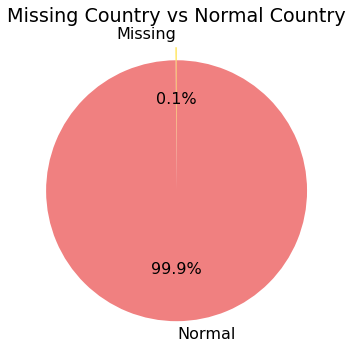

In [180]:
# Plot the results
missing_country = bids_df.country.isnull().sum()
normal_country = bids_df.country.notnull().sum()
x = [missing_country, normal_country]
import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(x, labels=["Missing", "Normal"], colors=["gold", "lightcoral"],explode=[0.1, 0], autopct='%1.1f%%', startangle=90)
plt.title("Missing Country vs Normal Country")
mpl.rcParams['font.size'] = 16
plt.show()

We should drop the null with country_missing. It only accounts for 0.12%

#### Understanding each column

In [49]:
# Merchandise
bids_df.merchandise.value_counts()

mobile              2126587
jewelry             1902058
sporting goods      1855207
home goods          1224234
office equipment     289838
furniture             99181
computers             81084
books and music       51941
clothing              16447
auto parts             9757
Name: merchandise, dtype: int64

In [50]:
# Country
bids_df.country.value_counts()

in    1788731
ng     586586
id     453611
tr     319574
us     318103
       ...   
an          2
er          2
gp          2
mh          1
tc          1
Name: country, Length: 199, dtype: int64

In [51]:
# Devices
bids_df.device.value_counts()

phone4       706573
phone2       171584
phone35      165230
phone65      153855
phone3       153202
              ...  
phone5925         1
phone5919         1
phone5917         1
phone5914         1
phone7498         1
Name: device, Length: 7351, dtype: int64

#### Check whether all bidders in bidder dataset are in bids dataset as well

In [89]:
# Total number of bidders in bidder dataset and in bids dataset
total_bidders_bidder = train_df.bidder_id.count() + test_df.bidder_id.count()
total_bidders_bids = len(bids_df.bidder_id.unique())
bidders_not_in_bids = total_bidders_bidder - total_bidders_bids

print(f"Total number of bidders from bidder dataset: {total_bidders_bidder} \n\
Total number of bidders from bids dataset: {total_bidders_bids} \n\
Number of bidders from bidder dataset are not in bids dataset: {bidders_not_in_bids}")

Total number of bidders from bidder dataset: 6713 
Total number of bidders from bids dataset: 6614 
Number of bidders from bidder dataset are not in bids dataset: 99


In [95]:
# Check numbder of the bidder who never bid from test and train dataset
bidders_in_train = train_df.bidder_id.unique().tolist() 
bidders_in_test = test_df.bidder_id.unique().tolist()
total_bidders = bidders_in_test + bidders_in_train
bidders_in_bids = bids_df.bidder_id.unique().tolist()

In [98]:
# Create a list for bidders not in bid
no_bidders = []
for i in total_bidders:
    if i not in bidders_in_bids:
        no_bidders.append(i)
        
len(no_bidders)

99

In [102]:
no_bidders_train = [i for i in no_bidders if i in bidders_in_train]
no_bidders_test = [i for i in no_bidders if i in bidders_in_test]
print(f"Number of bidders never bid in train: {len(no_bidders_train)}")
print(f"Number of bidders never bid in test: {len(no_bidders_test)}")

Number of bidders never bid in train: 29
Number of bidders never bid in test: 70


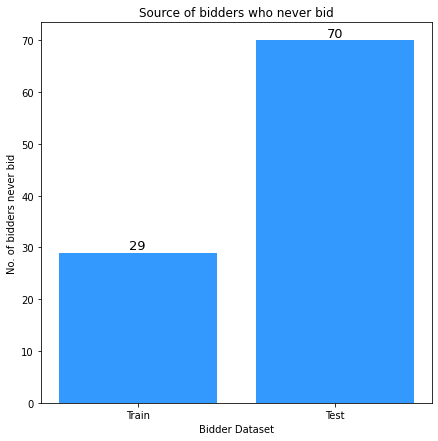

In [165]:
# Plot the results
x = np.arange(len(["Train", "Test"]))
y = [len(no_bidders_train), len(no_bidders_test)]

fig, ax = plt.subplots(figsize = (7,7))
bar = plt.bar(x, y, color= "#3399FF")
plt.title("Source of bidders who never bid")
plt.ylabel("No. of bidders never bid")
plt.xlabel("Bidder Dataset")
plt.xticks(x, labels=["Train", "Test"])
ax.bar_label(bar, padding=0.5, fontsize=13)
plt.show()

In [125]:
# Check whether the bidders who never bid are robots
no_bidders_robots = train_df.loc[(train_df.bidder_id.isin(no_bidders_train)) & (train_df.outcome == 1.0)].sum()
no_bidders_robots

bidder_id          0.0
payment_account    0.0
address            0.0
outcome            0.0
dtype: float64

The bidders who never bid are all human  

In [186]:
# Bidders for each auction
bidders_per_aution = bids_df.groupby("auction").count()["bidder_id"]

In [193]:
bidders_per_aution.sort_values(ascending=False)

auction
jqx39    537347
jefix    208926
no958     74020
opnq4     71446
du967     69633
          ...  
8czod         1
h4fxg         1
qhsb9         1
h3q12         1
d1roy         1
Name: bidder_id, Length: 15051, dtype: int64

In [195]:
bids_df["no_auction"] = bids_df.groupby("auction")["bidder_id"].transform("count")
bids_df.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,no_auction
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,1970-04-23 22:54:03.157894736,us,69.166.231.58,vasstdc27m7nks3,3331
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,1970-04-23 22:54:03.157894736,in,50.201.125.84,jmqlhflrzwuay9c,9376
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,1970-04-23 22:54:03.157894736,py,112.54.208.157,vasstdc27m7nks3,310
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,1970-04-23 22:54:03.157894736,in,18.99.175.133,vasstdc27m7nks3,208926
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,1970-04-23 22:54:03.157894736,in,145.138.5.37,vasstdc27m7nks3,208926


In [223]:
# How Long Does an Auction Last?
last_time = bids_df.groupby("auction")["time"].max()
first_time = bids_df.groupby("auction")["time"].min()

In [230]:
temp = (last_time-first_time).dt.total_seconds()
duration_df = temp.reset_index()
duration_df.rename({"time":"auction_duration(seconds)"}, axis=1, inplace=True)
duration_df.head()

,auction,auction_duration(seconds)
0,00270,10163.000000
1,008vv,1027.736842
2,00cwr,2994.947368
3,00do0,541.368421
4,00hjy,13313.473684


In [231]:
merged_bids = bids_df.merge(duration_df, how="inner", on="auction")
merged_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,auction_duration(seconds)
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,1970-04-23 22:54:03.157894736,us,69.166.231.58,vasstdc27m7nks3,13631.052632
1,30,708ba5d36271639a9003ace4dc2cc540mugek,ewmzr,mobile,phone27,1970-04-23 22:54:03.315789473,us,196.99.84.184,a1qvn2e5zlg48fw,13631.052632
2,46,6c8ffec692e88d81e1b18d47818abb04v6llr,ewmzr,home goods,phone8,1970-04-23 22:54:03.368421052,us,160.9.191.22,lok9xfe6k6rtv8f,13631.052632
3,67,2419ed502cf6b4cc6feb0a47697a045b4gqiq,ewmzr,mobile,phone55,1970-04-23 22:54:03.473684210,us,231.63.201.73,vasstdc27m7nks3,13631.052632
4,421,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,1970-04-23 22:54:05.368421052,us,69.166.231.58,vasstdc27m7nks3,13631.052632


In [233]:
merged_bids.sort_values(["auction_duration(seconds)"], ascending=False)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,auction_duration(seconds)
2609805,3420583,9655ccc7c0c193f1549475f02c54dce45kjw7,jqx39,sporting goods,phone333,1970-04-22 12:53:39.105263157,uk,83.114.47.13,vasstdc27m7nks3,77305.157895
2709503,4538839,4166f602845d237a960e4e79007cad10xbkdw,jqx39,jewelry,phone35,1970-04-22 14:19:05.368421052,in,76.191.91.231,vasstdc27m7nks3,77305.157895
2709699,4542713,6e178db6d17d21aa88aaca5bf15c2761lc500,jqx39,jewelry,phone38,1970-04-22 14:19:20.052631578,in,247.149.77.175,fwourjszelfkc3e,77305.157895
2709698,4542695,9328bc6389d718c41e33c4cefe7b9c15k1tau,jqx39,home goods,phone412,1970-04-22 14:19:20.000000000,in,216.197.201.221,wprdns8lqo3bs6t,77305.157895
2709697,4542685,9655ccc7c0c193f1549475f02c54dce45kjw7,jqx39,sporting goods,phone119,1970-04-22 14:19:19.947368421,at,222.253.32.38,vasstdc27m7nks3,77305.157895
...,...,...,...,...,...,...,...,...,...,...
2348865,1998950,cffb5f3c1f4ca815d0f643fcb2f2f316beod4,2fp00,jewelry,phone1096,1970-04-24 02:04:53.842105263,th,36.8.122.145,fmi4yhz0u2o7l18,0.000000
2348864,1994476,6767cffbe2c0957492aa451560655be3hjd6s,p6hdw,mobile,phone90,1970-04-24 02:04:19.315789473,au,1.114.233.191,bn3afx8e85uqwyh,0.000000
2348863,1990091,a6bf74b19fcb2687ce345930c4c16d4e2txda,ht7ap,mobile,phone46,1970-04-24 02:03:43.894736842,us,97.100.211.243,2gxeutuls9m8kh2,0.000000
2348862,1989904,8e46e0478d1fda88696becb31ff7978am9gxx,eo5i6,sporting goods,phone1211,1970-04-24 02:03:42.210526315,us,130.49.173.102,vasstdc27m7nks3,0.000000


In [236]:
merged_bids["auction_duration(seconds)"].value_counts()

77305.157895    537347
13642.052632    208926
75851.526316     74020
73893.368421     71446
77304.631579     69633
                 ...  
8483.842105          2
293.684211           2
3.052632             2
7621.947368          2
16.631579            2
Name: auction_duration(seconds), Length: 13525, dtype: int64